In [1]:
import pandas as pd
import numpy as np

from luwiji.text_proc import illustration, demo
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
text = demo.text
text

['Ini adalah pensil, tapi itu adalah pulpen',
 'Itu adalah pensil.',
 'Saya mau beli pulpen.',
 'Saya ada pulpen itu, tapi tidak ada pensil itu.',
 'Saya tidak ada pensil ini',
 'Saya mau beli pulpen dan pensil',
 'Ini adalah pulpen']

# Bag of Words(BoW)/ Term Frequensi (TF)

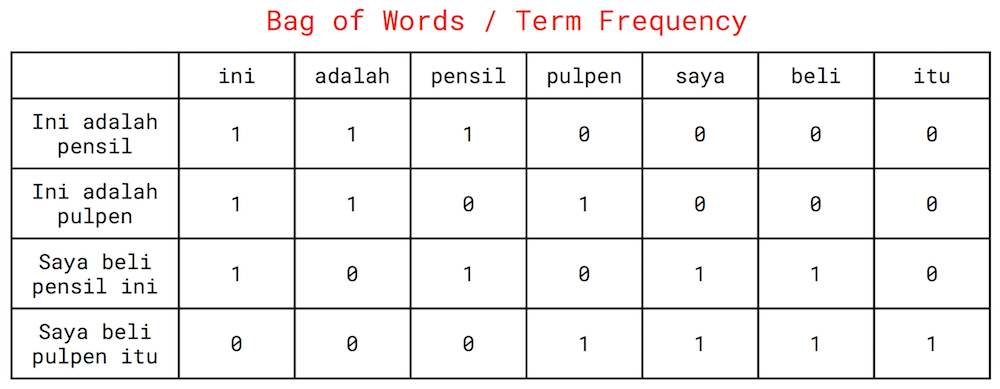

In [3]:
illustration.bag_of_words

In [4]:
bow = CountVectorizer()
bow_matrix = bow.fit_transform(text)

In [6]:
pd.DataFrame(bow_matrix.toarray(), columns = bow.get_feature_names(), index = text)

,ada,adalah,beli,dan,ini,itu,mau,pensil,pulpen,saya,tapi,tidak
"Ini adalah pensil, tapi itu adalah pulpen",0,2,0,0,1,1,0,1,1,0,1,0
Itu adalah pensil.,0,1,0,0,0,1,0,1,0,0,0,0
Saya mau beli pulpen.,0,0,1,0,0,0,1,0,1,1,0,0
"Saya ada pulpen itu, tapi tidak ada pensil itu.",2,0,0,0,0,2,0,1,1,1,1,1
Saya tidak ada pensil ini,1,0,0,0,1,0,0,1,0,1,0,1
Saya mau beli pulpen dan pensil,0,0,1,1,0,0,1,1,1,1,0,0
Ini adalah pulpen,0,1,0,0,1,0,0,0,1,0,0,0


tidak disarankan karena jika data besar maka running akan berat

# Inverse Document Frequency(IDF)

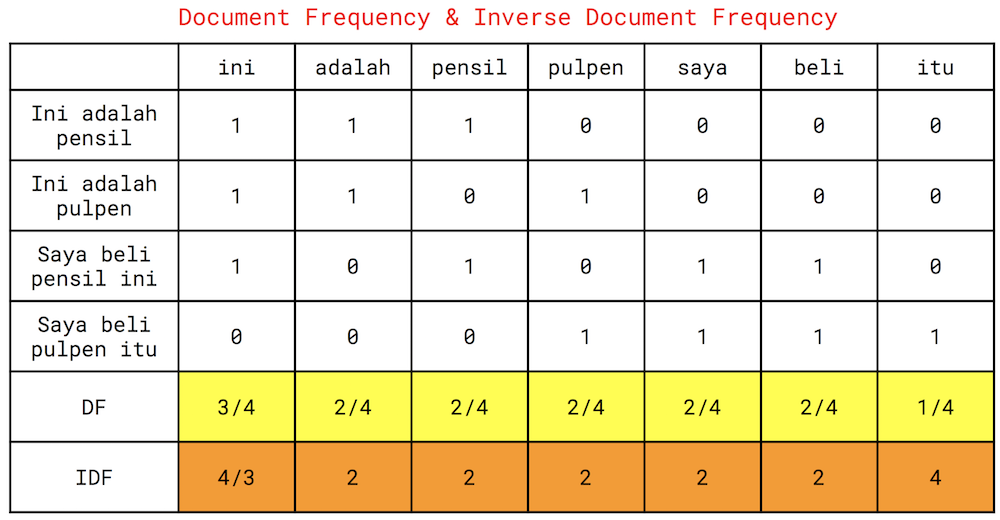

In [7]:
illustration.inverse_df

Kata yang jarang muncul = kata penting(keyword)

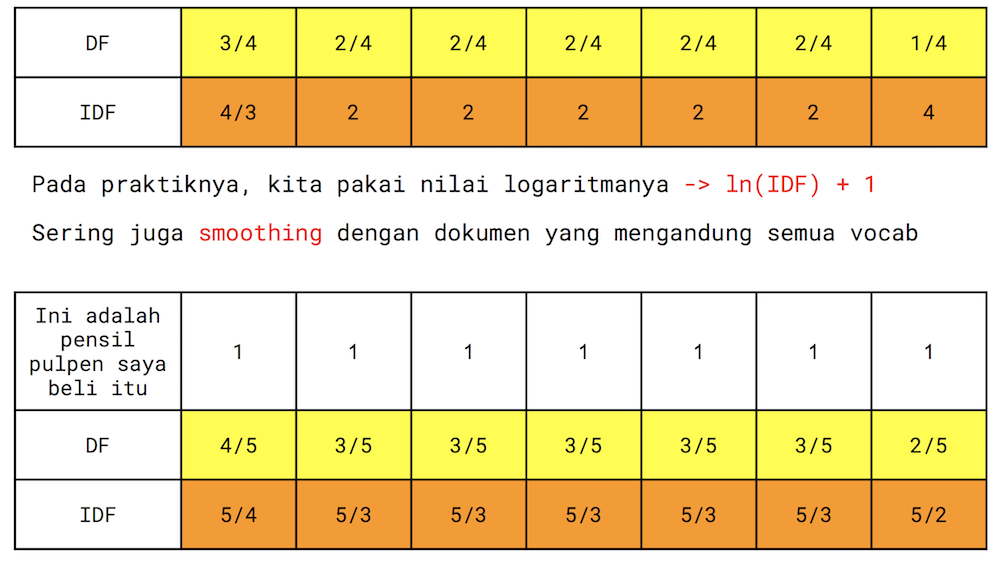

In [8]:
illustration.practical_idf

# Term Frequency - Inverse Document Frequency(TF-IDF)

TF-IDF = BoW yang di scalling dengan IDF
TF-IDF = BoW * IDF. ini seperti efek feature scalling untuk BoW agar  yang terlalu sering muncul di banyak dokumen diangap tidak penting. Misalnya stopword yang hampir muncul diseluruh dokumen.

In [10]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text)

In [11]:
pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names(), index = text)
# Tidak disarankan, karena pada ke adaan nyata data berukuran sangat besar

C:\Users\arifs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ada,adalah,beli,dan,ini,itu,mau,pensil,pulpen,saya,tapi,tidak
"Ini adalah pensil, tapi itu adalah pulpen",0.000000,0.684968,0.000000,0.000000,0.342484,0.342484,0.000000,0.260468,0.260468,0.000000,0.400675,0.000000
Itu adalah pensil.,0.000000,0.622766,0.000000,0.000000,0.000000,0.622766,0.000000,0.473630,0.000000,0.000000,0.000000,0.000000
Saya mau beli pulpen.,0.000000,0.000000,0.579934,0.000000,0.000000,0.000000,0.579934,0.000000,0.376999,0.430378,0.000000,0.000000
"Saya ada pulpen itu, tapi tidak ada pensil itu.",0.622620,0.000000,0.000000,0.000000,0.000000,0.532195,0.000000,0.202374,0.202374,0.231028,0.311310,0.311310
Saya tidak ada pensil ini,0.519598,0.000000,0.000000,0.000000,0.444135,0.000000,0.000000,0.337776,0.000000,0.385601,0.000000,0.519598
Saya mau beli pulpen dan pensil,0.000000,0.000000,0.454207,0.547181,0.000000,0.000000,0.454207,0.295267,0.295267,0.337074,0.000000,0.000000
Ini adalah pulpen,0.000000,0.622766,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000,0.473630,0.000000,0.000000,0.000000


dapat dilihat kata ini menjadi 0.3 karena dilemahkan IDF karena sering muncul dan yang jarang muncul dikuatkan

Kelemahan dari BoW dan TFIDF adalah urutan kata menjadi tidak mempengaruhi, sedangkan dalam ke adaan nyata urutan memiliki makna

# N - Gram

untuk mencakup informasi urutan kata

In [12]:
tfidf = TfidfVectorizer(ngram_range = (1,2))
tfidf_matrix = tfidf.fit_transform(text)

In [13]:
tfidf.get_feature_names()

C:\Users\arifs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ada',
 'ada pensil',
 'ada pulpen',
 'adalah',
 'adalah pensil',
 'adalah pulpen',
 'beli',
 'beli pulpen',
 'dan',
 'dan pensil',
 'ini',
 'ini adalah',
 'itu',
 'itu adalah',
 'itu tapi',
 'mau',
 'mau beli',
 'pensil',
 'pensil ini',
 'pensil itu',
 'pensil tapi',
 'pulpen',
 'pulpen dan',
 'pulpen itu',
 'saya',
 'saya ada',
 'saya mau',
 'saya tidak',
 'tapi',
 'tapi itu',
 'tapi tidak',
 'tidak',
 'tidak ada']